<a href="https://colab.research.google.com/github/nadinne94/estastitica_womakers/blob/main/Desafio_probabilidade_amostragem_WoMakersCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bootcamp Data Analytics 2024 | Challenge Frequência e Medidas**



# **Desafio 1: Entendendo o consumidor**



### **Bibliotecas e leitura da base**

In [ ]:
# bibliotecas base
import pandas as pd
import numpy as np

# bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# bibliotecas para estatística
import scipy.stats as stat
import math


In [ ]:
df_consumidor = pd.read_csv("desafio_01_consumidor.csv")

### **Análise exploratória**

#### **Comentários inciais:**

*   A idade média das pessoas é de aproximadamente 42 anos, com uma faixa etária que varia de 15 a 80 anos.
*   A renda varia bastante, entre 110 e 30000, o que demonstra uma disparidade econômica considerável

In [ ]:
# Tipos de variáveis

df_consumidor.dtypes

id_cliente      object
idade            int64
renda            int64
produto         object
regiao-BR       object
pre-pandemia     int64
dtype: object

In [ ]:
# Quantidade de linhas e colunas

df_consumidor.shape

(203, 6)

In [ ]:
# Análise das 10 primeiras linhas

df_consumidor.head(10)

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
5,XXXXXXX60,29,8055,batom,Nordeste,1
6,XXXXXXX73,22,9343,batom,Nordeste,1
7,XXXXXXX31,31,3748,batom,Sudeste,1
8,XXXXXXX13,34,3118,desodorante,Nordeste,1
9,XXXXXXX65,47,7404,batom,Sul,1


In [ ]:
# Informações gerias sobre os dados

df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


In [ ]:
# Quantidade de valores únicos

df_consumidor.nunique()

id_cliente       82
idade            58
renda           202
produto           6
regiao-BR         5
pre-pandemia      2
dtype: int64

In [ ]:
# Descrição da base em números, incluindo amplitude e variância

def describe_new(df_consumidor):
  df1 = df_consumidor.describe()
  df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
  df1.loc["variância"] = df1.loc["std"]*df1.loc['std']
  return df1

describe_new(df_consumidor)

,idade,renda,pre-pandemia
count,203.000000,2.030000e+02,203.000000
mean,42.403941,1.158636e+04,0.497537
std,14.400715,6.288017e+03,0.501230
min,15.000000,1.100000e+02,0.000000
25%,31.000000,6.705000e+03,0.000000
50%,41.000000,1.114500e+04,0.000000
75%,53.000000,1.559050e+04,1.000000
max,80.000000,3.000000e+04,1.000000
amplitude,65.000000,2.989000e+04,1.000000
variância,207.380578,3.953915e+07,0.251232


In [ ]:
# Verificar se há dados duplicados

df_consumidor.duplicated().sum()

0

In [ ]:
df_consumidor = df_consumidor.rename(columns={'regiao-BR': 'regiao'})

**Separação dos dados em pré e pós pandemia**



In [ ]:
df_consumidor_pre = df_consumidor[df_consumidor['pre-pandemia'] == 1]
df_consumidor_pos = df_consumidor[df_consumidor['pre-pandemia'] == 0]

### **Perguntas**

**1. Entenda a distribuição de variáveis como de idade / renda / regiao / produtos mais comprados antes e depois da pandemia**

**a. Identifique as distribuições**

**b. Plote histogramas / boxplots**

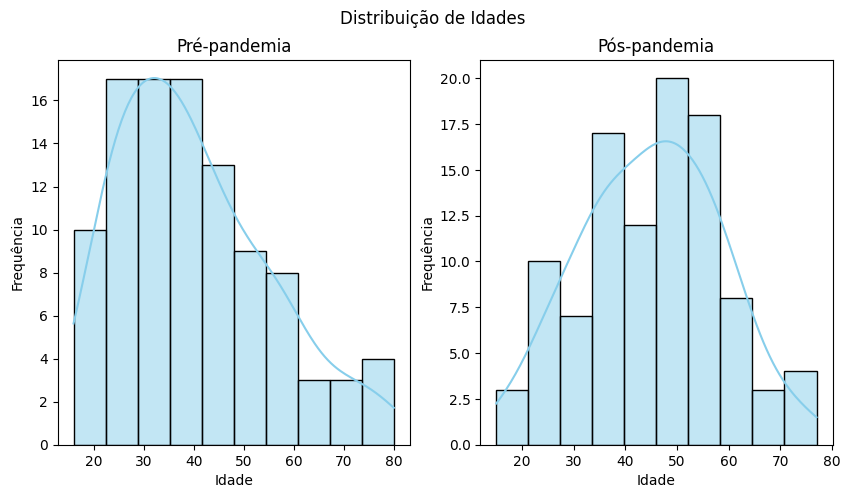

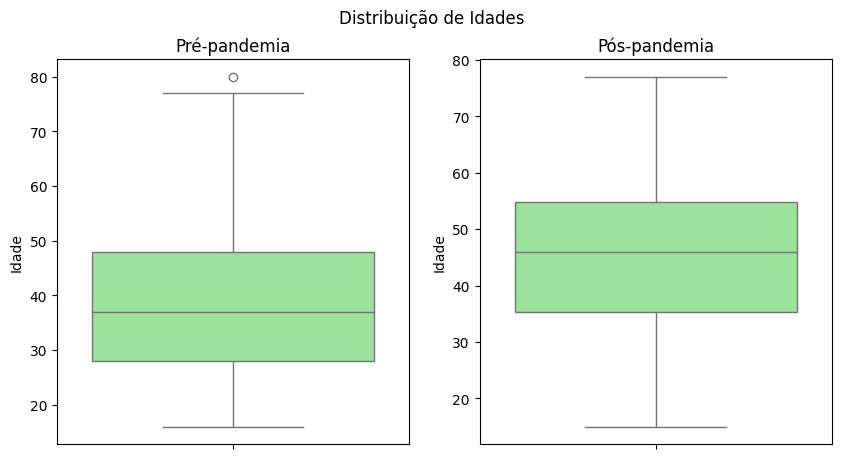

In [ ]:
# Plotar histograma para idade
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_consumidor_pre['idade'], bins=10, kde=True, color='skyblue')
plt.title('Pré-pandemia')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df_consumidor_pos['idade'], bins=10, kde=True, color='skyblue')
plt.title('Pós-pandemia')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.suptitle('Distribuição de Idades')
plt.show()

# Plotar boxplot para idade
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df_consumidor_pre['idade'], color='lightgreen')
plt.title('Pré-pandemia')
plt.ylabel('Idade')

plt.subplot(1, 2, 2)
sns.boxplot(df_consumidor_pos['idade'], color='lightgreen')
plt.title('Pós-pandemia')
plt.ylabel('Idade')

plt.suptitle('Distribuição de Idades')
plt.show()

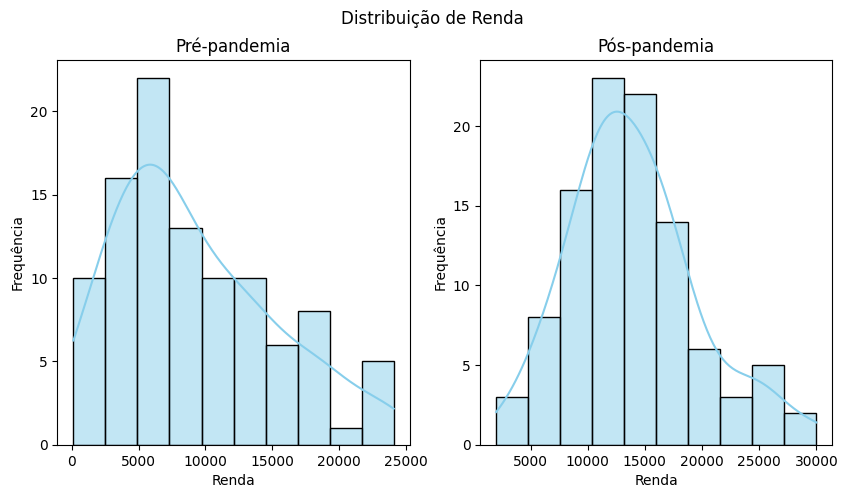

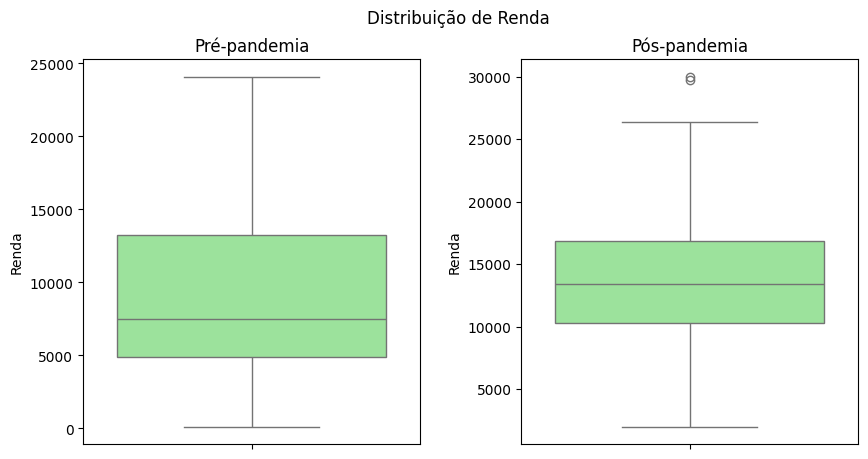

In [ ]:
# Plotar histograma para Renda
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_consumidor_pre['renda'], bins=10, kde=True, color='skyblue')
plt.title('Pré-pandemia')
plt.xlabel('Renda')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df_consumidor_pos['renda'], bins=10, kde=True, color='skyblue')
plt.title('Pós-pandemia')
plt.xlabel('Renda')
plt.ylabel('Frequência')

plt.suptitle('Distribuição de Renda')
plt.show()

# Plotar boxplot para Renda
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df_consumidor_pre['renda'], color='lightgreen')
plt.title('Pré-pandemia')
plt.ylabel('Renda')

plt.subplot(1, 2, 2)
sns.boxplot(df_consumidor_pos['renda'], color='lightgreen')
plt.title('Pós-pandemia')
plt.ylabel('Renda')
plt.subplots_adjust(wspace=0.3,hspace=0.1)

plt.suptitle('Distribuição de Renda')
plt.show()

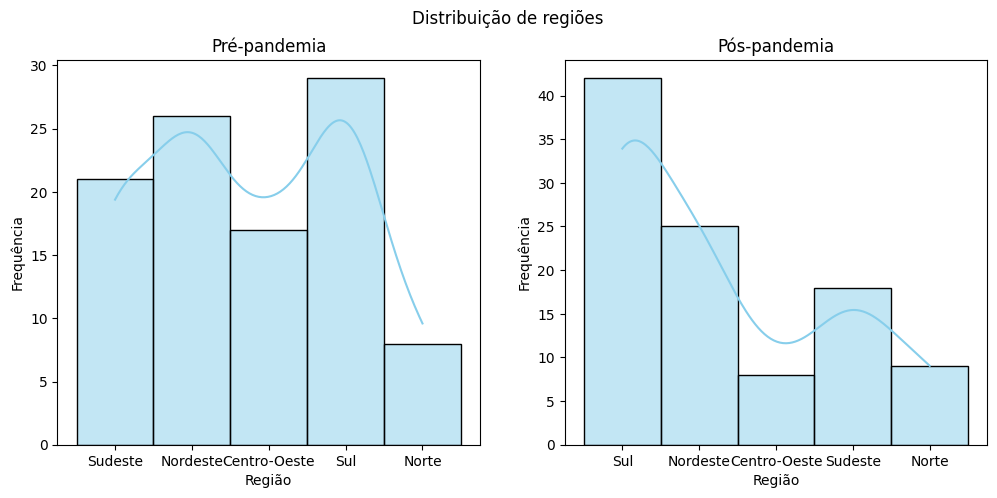

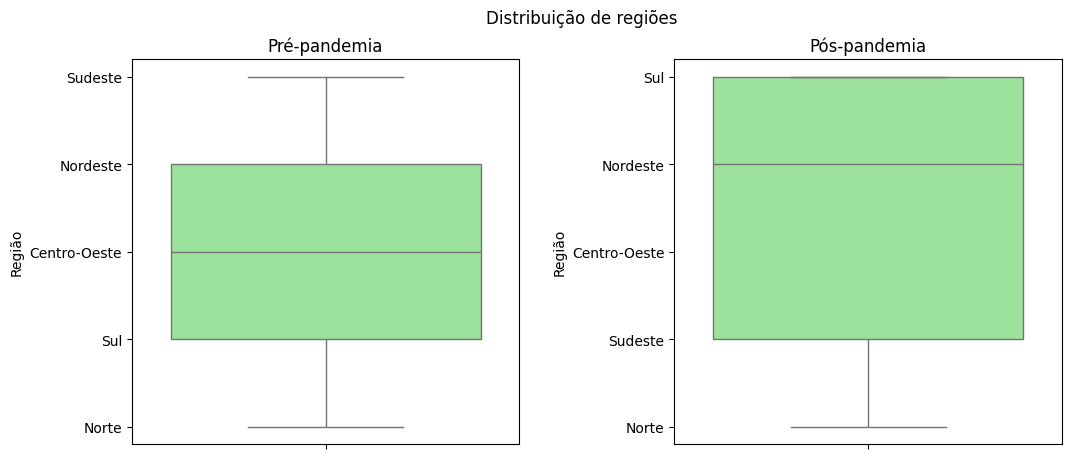

In [ ]:
# Plotar histograma para regiao
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_consumidor_pre['regiao'], bins=10, kde=True, color='skyblue')
plt.title('Pré-pandemia')
plt.xlabel('Região')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df_consumidor_pos['regiao'], bins=10, kde=True, color='skyblue')
plt.title('Pós-pandemia')
plt.xlabel('Região')
plt.ylabel('Frequência')

plt.suptitle('Distribuição de regiões')
plt.show()

# Plotar boxplot para regiao
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df_consumidor_pre['regiao'], color='lightgreen')
plt.title('Pré-pandemia')
plt.ylabel('Região')

plt.subplot(1, 2, 2)
sns.boxplot(df_consumidor_pos['regiao'], color='lightgreen')
plt.title('Pós-pandemia')
#plt.xlabel('Frequência')
plt.ylabel('Região')
plt.subplots_adjust(wspace=0.4,hspace=0.1)

plt.suptitle('Distribuição de regiões')
plt.show()

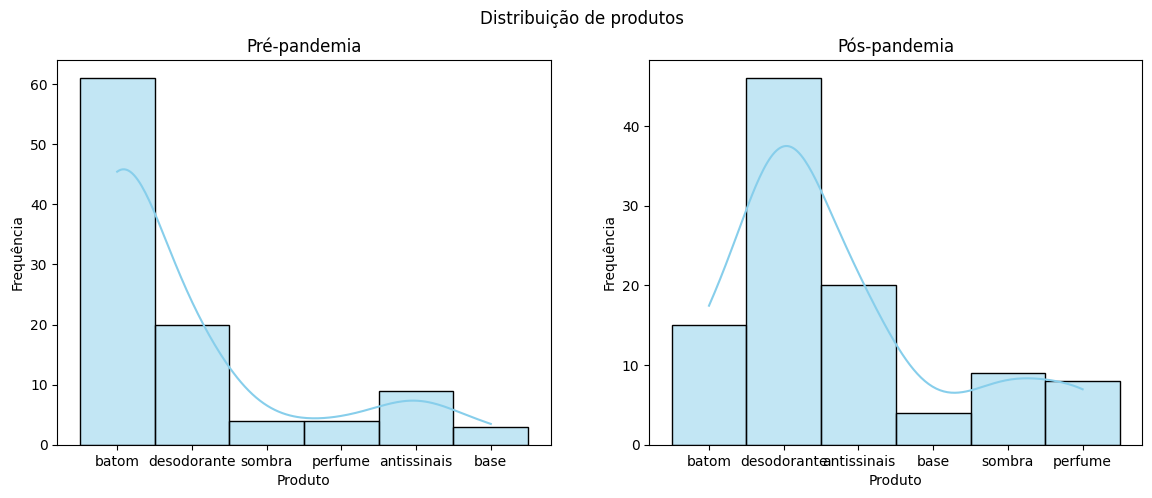

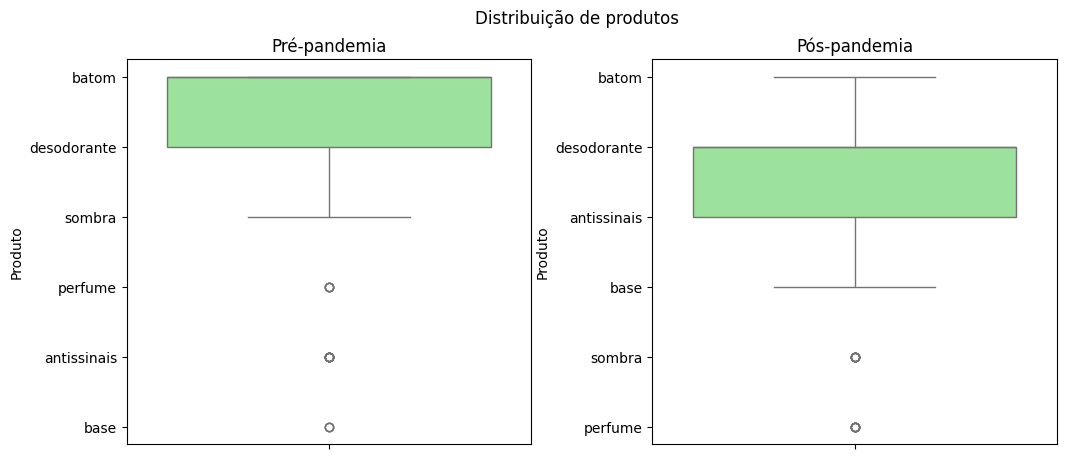

In [ ]:
# Plotar histograma por produto
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_consumidor_pre['produto'], bins=10, kde=True, color='skyblue')
plt.title('Pré-pandemia')
plt.xlabel('Produto')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df_consumidor_pos['produto'], bins=10, kde=True, color='skyblue')
plt.title('Pós-pandemia')
plt.xlabel('Produto')
plt.ylabel('Frequência')

plt.suptitle('Distribuição de produtos')
plt.show()

# Plotar boxplot por produto
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df_consumidor_pre['produto'], color='lightgreen')
plt.title('Pré-pandemia')
plt.ylabel('Produto')

plt.subplot(1, 2, 2)
sns.boxplot(df_consumidor_pos['produto'], color='lightgreen')
plt.title('Pós-pandemia')
#plt.xlabel('Frequência')
plt.ylabel('Produto')
plt.subplots_adjust(wspace=0.3,hspace=0.1)

plt.suptitle('Distribuição de produtos')
plt.show()

In [ ]:
# Contagem de produtos antes e depois da pandemia
produtos_antes = df_consumidor[df_consumidor['pre-pandemia'] == 1]['produto'].value_counts()
produtos_depois = df_consumidor[df_consumidor['pre-pandemia'] == 0]['produto'].value_counts()

# Criar dataframe com contagem de produtos
df_produtos = pd.DataFrame({'Antes da Pandemia': produtos_antes, 'Depois da Pandemia': produtos_depois}).fillna(0)

# Ordenar os produtos por ordem decrescente antes da pandemia
df_produtos = df_produtos.sort_values(by='Antes da Pandemia', ascending=False)

df_produtos.head()


,Antes da Pandemia,Depois da Pandemia
batom,61,15
desodorante,20,46
antissinais,9,20
perfume,4,8
sombra,4,9


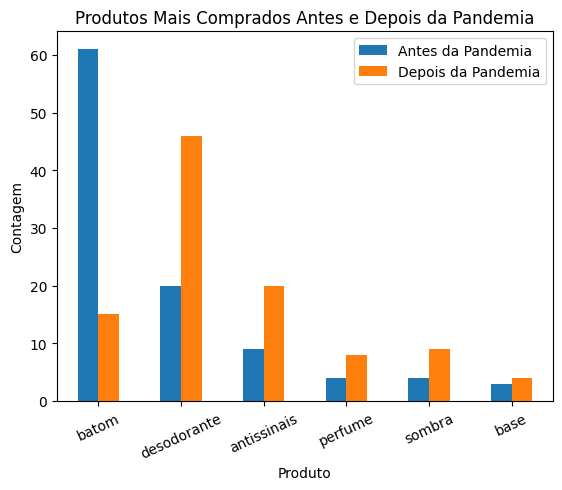

In [ ]:
# Plotar gráfico de barras
df_produtos.plot(kind='bar')
plt.title('Produtos Mais Comprados Antes e Depois da Pandemia')
plt.xlabel('Produto')
plt.ylabel('Contagem')
plt.xticks(rotation=25)
plt.legend(['Antes da Pandemia', 'Depois da Pandemia'])
plt.show()

**2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ? (pergunta extra)**

**3. Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?**

In [ ]:
def calcular_tamanho_amostra(df_consumidor, margem_erro, nivel_confianca):
    proporcao_estimada = df_consumidor['pre-pandemia'].mean()
    z = 1.96
    n = (z ** 2 * proporcao_estimada * (1 - proporcao_estimada)) / (margem_erro ** 2)
    return math.ceil(n)

# Cálculo para uma margem de erro de 2%
margem_erro_2 = 0.02
nivel_confianca = 0.95
tamanho_amostra_2 = calcular_tamanho_amostra(df_consumidor, margem_erro_2, nivel_confianca)
print("Tamanho da amostra para uma margem de erro de 2%:", tamanho_amostra_2)


Tamanho da amostra para uma margem de erro de 2%: 2401


In [ ]:
#cálculo para uma margem de erro de 10%
margem_erro_10 = 0.1
tamanho_amostra_10 = calcular_tamanho_amostra(df_consumidor, margem_erro_10, nivel_confianca)
print("Tamanho da amostra para uma margem de erro de 10%:", tamanho_amostra_10)

Tamanho da amostra para uma margem de erro de 10%: 97


**Resposta**

A base de dados não é suficiente, a amostra precisaria ter 2401 linhas. Além disso, para 10% é suficiente, já que a amostra tem 203 linhas.

# **Desafio 2: Determinando o Estoque de Segurança**


### **Bibliotecas e leitura da base**

In [ ]:
# bibliotecas base
import pandas as pd
import numpy as np

# bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# bibliotecas para estatística
import scipy.stats as stats

In [ ]:
df_estoque = pd.read_csv("desafio_02_estoque.csv")

### **Análise exploratória**

In [ ]:
# Tipos de variáveis
df_estoque.dtypes

data              object
vendas-iogurte     int64
lead-time          int64
dtype: object

In [ ]:
# Quantidade de linhas e colunas
df_estoque.shape

(370, 3)

In [ ]:
# Análise das 10 primeiras linhas
df_estoque.head(10)

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5
5,2015-02-08,4993,6
6,2015-02-15,5039,9
7,2015-02-22,4981,8
8,2015-03-01,4983,3
9,2015-03-08,5065,7


In [ ]:
# Informações gerias sobre os dados
df_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            370 non-null    object
 1   vendas-iogurte  370 non-null    int64 
 2   lead-time       370 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [ ]:
# Quantidade de valores únicos
df_estoque.nunique()

data              370
vendas-iogurte    207
lead-time           9
dtype: int64

In [ ]:
# Descrição da base em números, incluindo amplitude e variância
def describe_new(df_estoque):
  df1 = df_estoque.describe()
  df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
  df1.loc["variância"] = df1.loc["std"]*df1.loc['std']
  return df1

describe_new(df_estoque)

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000
amplitude,422.000000,8.000000
variância,5972.981770,2.492383


In [ ]:
# Verificar se há dados duplicados
df_estoque.duplicated().sum()

0

**Conversão da coluna "data" de object para o tipo datetime**

In [ ]:
# Convertendo a coluna de data para o formato datetime
df_estoque['data'] = pd.to_datetime(df_estoque['data'])

In [ ]:
df_estoque.dtypes

data              datetime64[ns]
vendas-iogurte             int64
lead-time                  int64
dtype: object

**Renomeando as colunas**

In [ ]:
df_estoque = df_estoque.rename(columns={'data': 'Data', 'vendas-iogurte': 'Vendas de Iogurte', 'lead-time': 'Lead Time'})
df_estoque

,Data,Vendas de Iogurte,Lead Time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5
...,...,...,...
365,2022-01-02,5120,5
366,2022-01-09,4968,3
367,2022-01-16,5095,6
368,2022-01-23,4941,6


### **Perguntas**

**1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?**

**Verificando os valores de média, mediana e moda**

In [ ]:
df_estoque_valores = pd.DataFrame()
df_estoque_valores['Média'] = df_estoque.mean(numeric_only=True)
df_estoque_valores['Mediana'] = df_estoque.median(numeric_only=True)
#df_estoque_valores['Moda'] = df_estoque['Vendas de Iogurte'].mode()[0]
#df_estoque_valores['Moda'] = df_estoque['Lead Time'].mode()[0]
print('Moda - Vendas de Iogurte:', df_estoque['Vendas de Iogurte'].mode()[0])
print('Moda - Lead Time:', df_estoque['Lead Time'].mode()[0])
df_estoque_valores

Moda - Vendas de Iogurte: 5020
Moda - Lead Time: 5


,Média,Mediana
Vendas de Iogurte,4999.170270,4996.0
Lead Time,5.094595,5.0


**Analisando graficamente**

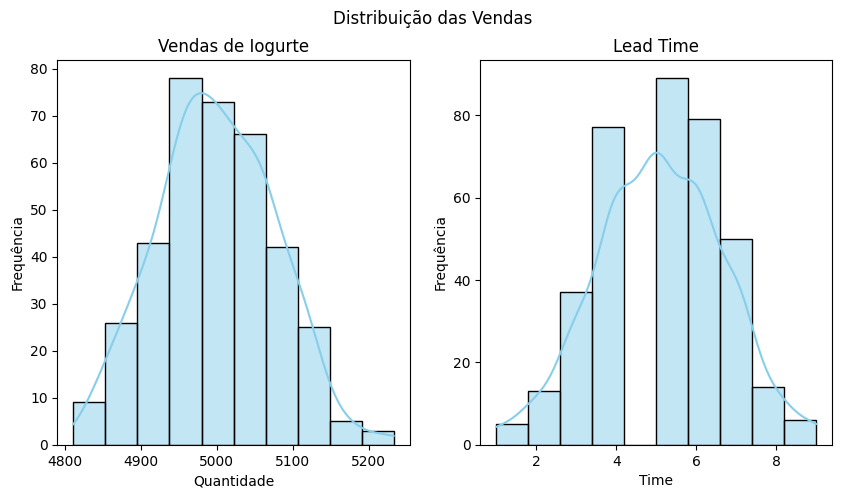

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_estoque['Vendas de Iogurte'], bins=10, kde=True, color='skyblue')
plt.title('Vendas de Iogurte')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df_estoque['Lead Time'], bins=10, kde=True, color='skyblue')
plt.title('Lead Time')
plt.xlabel('Time')
plt.ylabel('Frequência')

plt.suptitle('Distribuição das Vendas')
plt.show()

**Teste de Normalidade de Kolmogorov-Smirnov**

In [ ]:
alpha = 0.05
k2, p = stats.normaltest(df_estoque['Vendas de Iogurte'])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

A hipótese nula não pode ser rejeitada


In [ ]:
alpha = 0.05
k2, p = stats.normaltest(df_estoque['Lead Time'])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

A hipótese nula não pode ser rejeitada


**2. Assuma que:**

**a. Os dados seguem uma distribuição normal.**

**b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%**

**c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.**

In [ ]:
# demanda média passada ou estimada
d = df_estoque['Vendas de Iogurte'].mean()
d

4999.1702702702705

In [ ]:
# lead time médio.
t = df_estoque['Lead Time'].mean()
t

5.094594594594595

In [ ]:
# variação da demanda
var_d = df_estoque['Vendas de Iogurte'].max() - df_estoque['Vendas de Iogurte'].min()
var_d

422

In [ ]:
# variação do lead time
var_lt = df_estoque['Lead Time'].max() - df_estoque['Lead Time'].min()
var_lt

8

In [ ]:
# desvio padrão / variação da demanda
std_d = df_estoque['Vendas de Iogurte'].std()/var_d
std_d

0.18313997208230937

In [ ]:
# desvio padrão / variação do lead time
std_lt = df_estoque['Lead Time'].std()/var_lt
std_lt

0.19734102092447767

- Para um nível de serviço de 99,87%, a área sob a curva normal à esquerda de z deve ser igual a 99,87%.
- Consultando a tabela da distribuição normal, encontramos que o valor de z que corresponde a uma área de 99,87% é 3,00.

In [ ]:
est_seg = 3 * np.sqrt(((std_d ** 2) * t) + ((std_lt ** 2) * d**2))
est_seg

2959.6243545389

In [ ]:
print('O estoque de segurança deve ser:', round(est_seg))

O estoque de segurança deve ser: 2960
